In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# models
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, f1_score
# nlp 
from nltk.corpus import stopwords
stop = stopwords.words("english")

In [2]:
data = pd.read_csv("data/datanews_nostop.csv")

In [3]:
data["label"].value_counts()

0    22845
1    21416
Name: label, dtype: int64

In [4]:
# data["content"] = data["content"].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data["content"], data["label"], test_size = 0.2, random_state = 1)

f1 score: 97.982


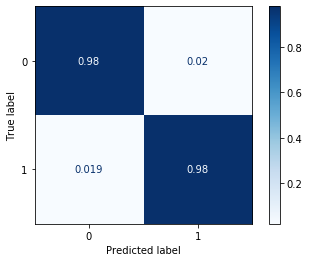

In [6]:
pipe = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", LogisticRegression(random_state = 1))
])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
score = f1_score(y_test, prediction)
print("f1 score: %0.3f" % (score*100))
plot_confusion_matrix(model, X_test, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()

In [6]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)

In [7]:
# Random Forest
# num_est = [50, 100, 300, 500, 700, 900]
# train_scores_est, test_scores_est = validation_curve(
#     RandomForestClassifier(), X_train_vec, y_train, 
#     param_name = "n_estimators", param_range = num_est, scoring = "f1")
# train_mean_est = np.mean(train_scores_est, axis = 1)
# test_mean_est = np.mean(test_scores_est, axis = 1)

# max_depth = [5, 15, 25, 35, 45]
# train_scores_dep, test_scores_dep = validation_curve(
#     RandomForestClassifier(), X_train_vec, y_train, 
#     param_name = "max_depth", param_range = max_depth, scoring = "f1")
# train_mean_dep = np.mean(train_scores_dep, axis = 1)
# test_mean_dep = np.mean(test_scores_dep, axis = 1)

# min_samples_split = [2, 5, 10, 15, 20, 25]
# train_scores_sam, test_scores_sam = validation_curve(
#     RandomForestClassifier(), X_train_vec, y_train, 
#     param_name = "min_samples_split", param_range = min_samples_split, scoring = "f1")
# train_mean_sam = np.mean(train_scores_sam, axis = 1)
# test_mean_sam = np.mean(test_scores_sam, axis = 1)

In [134]:
# run again for number 2


In [9]:
# cv_scores = {
#     "estimators": {
#         "train": train_mean_est,
#         "val": test_mean_est,
#         "range": num_est
# },
#     "depth": {
#         "train": train_mean_dep,
#         "val": test_mean_dep,
#         "range": max_depth
#  },
#     "samples": {
#         "train": train_mean_sam,
#         "val": test_mean_sam,
#         "range": min_samples_split
#  }
# }
# Save
# np.save("data/cv_scores.npy", cv_scores) 
# Load
cv_scores = np.load('data/cv_scores.npy',allow_pickle='TRUE').item()
cv_scores

{'estimators': {'train': array([1., 1., 1., 1., 1., 1.]),
  'val': array([0.97716011, 0.98133685, 0.98159185, 0.98302562, 0.98254848,
         0.982627  ]),
  'range': [50, 100, 300, 500, 700, 900]},
 'depth': {'train': array([0.94887182, 0.9811132 , 0.99349919, 0.99775733, 0.99934394]),
  'val': array([0.94344766, 0.96469334, 0.97310439, 0.97668256, 0.97778591]),
  'range': [5, 15, 25, 35, 45]},
 'samples': {'train': array([1.        , 1.        , 0.99999271, 0.99999271, 0.99997812,
         0.99996353]),
  'val': array([0.9802245 , 0.98056665, 0.98062809, 0.97920945, 0.97991803,
         0.98013622]),
  'range': [2, 5, 10, 15, 20, 25]}}

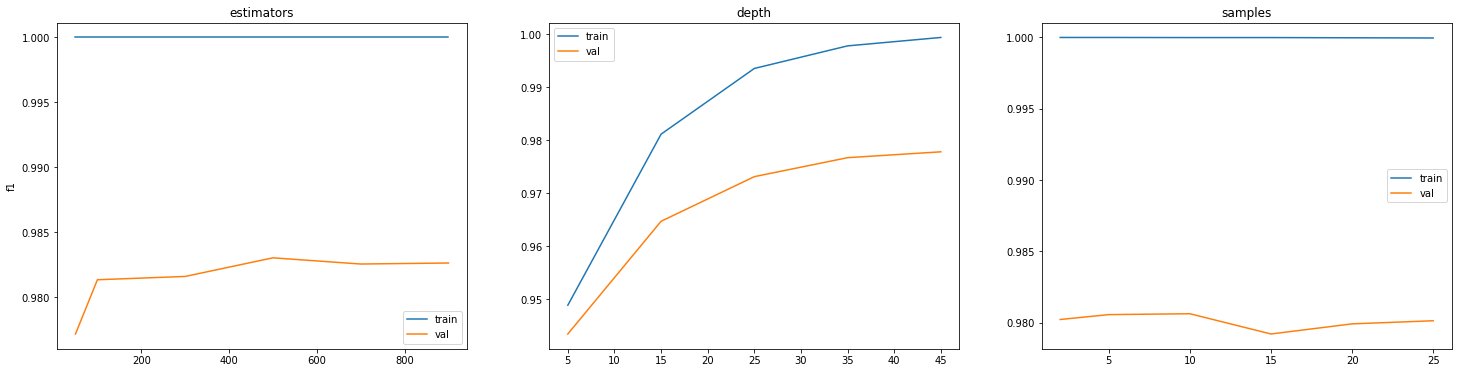

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25,6))
hyperp = list(cv_scores.keys())
for i in range(len(cv_scores)):
    ax[i].plot(cv_scores[hyperp[i]]["range"], cv_scores[hyperp[i]]["train"], label = "train")
    ax[i].plot(cv_scores[hyperp[i]]["range"], cv_scores[hyperp[i]]["val"], label = "val")
    ax[i].set_title(hyperp[i])
    ax[i].legend()
ax[0].set_ylabel("f1")
plt.show()

f1 score: 98.143


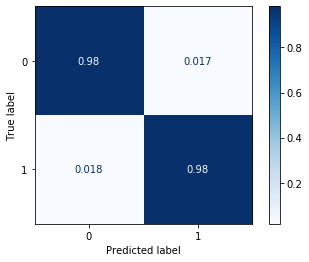

In [13]:
# estimators = 100
# depth = 45
# samples = 2
pipe = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", RandomForestClassifier(n_estimators = 100, max_depth = 45, min_samples_split = 2))
])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
score = f1_score(y_test, prediction)
print("f1 score: %0.3f" % (score*100))
plot_confusion_matrix(model, X_test, y_test, normalize = "true", cmap = "Blues")
plt.grid(False)
plt.show()